In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import scipy as sp
import mevpy as mev
import random
import os
import time

In [2]:
path = r"C:\Users\meesw\Documents\TU delft\BEP\Eindwerk\test"
os.chdir(path)

T = np.asarray([0.5, 1, 1.2, 1.5, 2, 5, 10, 20, 35, 50, 100])
F = np.exp(-(1/T))*(1/T)**0

def weerstation(N, yarb):
    g1 = []
    g2 = []
    T = []
    T1, T5, T100 = [], [], []
    tr1 = []
    tr2 = []
    amax1 = []
    amax2 = []
    datass = []
    qone = []
    qtwo = []
    
    for file in os.listdir():
        if file.endswith(".txt"):
            file_path = f"{path}\{file}"
            rain = pd.read_csv(file_path, skipinitialspace=True, sep=" ", parse_dates=[0], header=None, skiprows=1, names=['date', 'RD'])
            rain = rain.set_index("date")
            rain['YEAR'] = rain.index.year
            rain = rain[rain.RD != 99999.9]
            y0 = rain['YEAR'].unique()[-(N+1)]
            dataN = rain.loc[str(y0): '2021']
    
            if np.count_nonzero(dataN['RD'].notnull() != False) > 365.25*60*0.95: 
                AMS1, q1, T_a1    = mev.tab_rain_max(dataN[0 : int(len(dataN)/2)])
                T_real1 = -1/(np.log(1-(1/T_a1)))
                csi1, sigma1, mu1 = mev.gev_fit(AMS1)
                gev_estimate1 = mev.gev_quant(F, csi1, sigma1, mu1)
    
                AMS2, q2, T_a2    = mev.tab_rain_max(dataN[int(len(dataN)/2) : -1])
                T_real2 = -1/(np.log(1-(1/T_a2)))
                csi2, sigma2, mu2 = mev.gev_fit(AMS2)
                gev_estimate2 = mev.gev_quant(F, csi2, sigma2, mu2) 
                
                g1.append(gev_estimate1)
                g2.append(gev_estimate2)
                tr1.append(T_real1)
                tr2.append(T_real2)
                amax1.append(AMS1)
                amax2.append(AMS2)
                datass.append(dataN)
                qone.append(q1)
                qtwo.append(q2)
    
    for i in range(len(g1)):
        T.append((g2[i] - g1[i]) / g1[i])
        T1.append(T[i][1])
        T5.append(T[i][5])
        T100.append(T[i][-1])
    
    return tr1, tr2, amax1, amax2, g1, g2, T1, T5, T100, datass, T_a1, T_a2, qone, qtwo     #misschien ook d1 en d2 checken

def Gumbel(AMS, q, T):
    T_a = 1 / (1 - np.exp(-1/T))
    
    y =  -np.log(-np.log(q))
    std_y = np.std(y, ddof=1)         
    std_R = np.std(AMS, ddof=1)       
    y_gem = np.mean(y)
    ams_gem = np.mean(AMS)
    sigma = std_R / std_y 
    mu = ams_gem - sigma * y_gem

    gum_estimate = (sigma * (-np.log(-np.log(1 - 1/T_a))) + mu)
    return gum_estimate

In [3]:
T_real1, T_real2, AMS1, AMS2, g1, g2, T1, T5, T100, datass, T_a1, T_a2, q1, q2 = weerstation(60, '2021')

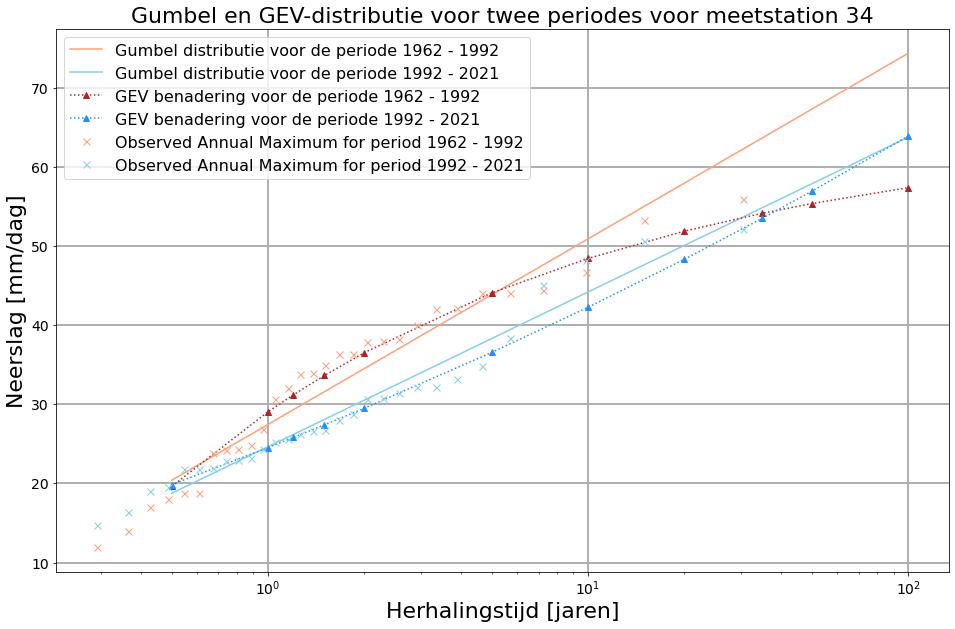

In [4]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(T, Gumbel(AMS1[34], q1[34], T), label='Gumbel distributie voor de periode 1962 - 1992', color='lightsalmon')
ax.plot(T, Gumbel(AMS2[34], q2[34], T), label='Gumbel distributie voor de periode 1992 - 2021', color='skyblue')
ax.plot(T, g1[34], ':^r', label='GEV benadering voor de periode 1962 - 1992', color='firebrick')
ax.plot(T, g2[34], ':^r', label='GEV benadering voor de periode 1992 - 2021', color='dodgerblue')
ax.plot(T_real1[34], AMS1[34], 'xk', markersize=7, label=f'Observed Annual Maximum for period 1962 - 1992', color='lightsalmon')
ax.plot(T_real2[34], AMS2[34], 'xk', markersize=7, label='Observed Annual Maximum for period 1992 - 2021', color= 'skyblue')
ax.set_title('Gumbel en GEV-distributie voor twee periodes voor meetstation 34', fontsize= 22)
ax.set_xlabel('Herhalingstijd [jaren]', fontsize= 22)
ax.set_ylabel('Neerslag [mm/dag]', fontsize= 22)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xscale('log')
ax.grid(True, lw=2)
ax.legend(loc='best', fontsize= 16)
plt.savefig("Generalized Extreme Value distributie voor twee opeenvolgende periodes voor meetstation 34", dpi=300);

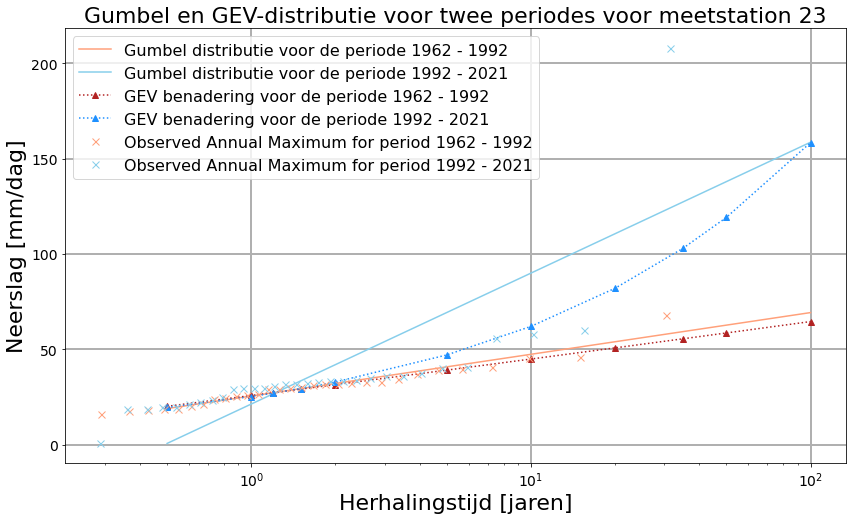

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(T, Gumbel(AMS1[23], q1[23], T), label='Gumbel distributie voor de periode 1962 - 1992', color='lightsalmon')
ax.plot(T, Gumbel(AMS2[23], q2[23], T), label='Gumbel distributie voor de periode 1992 - 2021', color='skyblue')
ax.plot(T, g1[23], ':^r', label='GEV benadering voor de periode 1962 - 1992', color='firebrick')
ax.plot(T, g2[23], ':^r', label='GEV benadering voor de periode 1992 - 2021', color='dodgerblue')
ax.plot(T_real1[23], AMS1[23], 'xk', markersize=7, label=f'Observed Annual Maximum for period 1962 - 1992', color='lightsalmon')
ax.plot(T_real2[23], AMS2[23], 'xk', markersize=7, label='Observed Annual Maximum for period 1992 - 2021', color= 'skyblue')
ax.set_title('Gumbel en GEV-distributie voor twee periodes voor meetstation 23', fontsize= 22)
ax.set_xlabel('Herhalingstijd [jaren]', fontsize= 22)
ax.set_ylabel('Neerslag [mm/dag]', fontsize= 22)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xscale('log')
ax.grid(True, lw=2)
ax.legend(loc='best', fontsize= 16)
plt.savefig("Generalized Extreme Value distributie voor twee opeenvolgende periodes voor meetstation 23", dpi=300);